In [1]:
%matplotlib notebook
from astropy.table import Table, vstack, join
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(f'{os.environ["HOME"]}/Projects/planckClusters/catalogs')
from load_catalogs import load_PSZcatalog

from astropy.io.fits import getheader
                
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)
                
from astropy import visualization
import corner
from sklearn import mixture
import scipy.stats as stats

In [2]:
def load_MCMCfits(outpath, fields):
    for field in fields:
        if os.path.exists(f'{outpath}/{field}/{field}_mcmcfits.txt'):
            fit_part = Table.read(f'{outpath}/{field}/{field}_mcmcfits.txt', format='ascii', header_start=0)
            src_part = Table.read(f'{outpath}/{field}/{field}_vtp.detect', format='fits')
            
            fit_part.rename_column('ID', 'INDEX')
            try:
                data_part = join(fit_part, src_part, keys='INDEX', join_type='inner')
            except ValueError:
                continue
        else:
            continue

        # handle the first pass when we only have one part
        try:
            data = vstack([data, data_part])
        except NameError:
            data = data_part
        
    return data

In [3]:
def load_detcats(outpath, fields):
    for field in fields:
        if os.path.exists(f'{outpath}/{field}/{field}_vtp.detect'):
            data_part = Table.read(f'{outpath}/{field}/{field}_vtp.detect', format='fits')
            if len(data_part) > 0:
                data_part['Field'] = field
                hdr = getheader(f'{outpath}/{field}/{field}_vtp_high.detect', ext=1)

                data_part['Field_EXP'] = hdr['EXPOSURE']
        else:
            continue

        # handle the first pass when we only have one part
        try:
            data = vstack([data, data_part])
        except NameError:
            data = data_part
        
    return data

In [4]:
# get file data
data = load_PSZcatalog()
data = data.sort_index(axis=1)

outpath = './data_full'

In [5]:
fields = [n.replace(' ', '_') for n in data['NAME']]
fits = load_MCMCfits(outpath, fields)

In [6]:
cats = load_detcats(outpath, fields)

In [7]:
fits.remove_column('R')
df = fits.to_pandas()

In [7]:
df[df.Field == 'PSZ2_G306.77+58.61']

NameError: name 'df' is not defined

In [8]:
grp = df.groupby('Field')

NameError: name 'df' is not defined

In [9]:
grp.INDEX.count()

NameError: name 'grp' is not defined

In [10]:
field = 'PSZ2_G306.77+58.61'

In [11]:
src_part = Table.read(f'{outpath}/{field}/{field}_vtp.detect', format='fits')

In [12]:
src_part['FIELD'] = field

In [18]:
src_part[79]

INDEX,RA,RA_ERR,DEC,DEC_ERR,X,Y,X_ERR,Y_ERR,SRC_AREA,NET_COUNTS,NET_COUNTS_ERR,BKG_COUNTS,BKG_COUNTS_ERR,NET_RATE,NET_RATE_ERR,BKG_RATE,BKG_RATE_ERR,EXPTIME,SRC_CUTOFF,FSP,EDGE_OF_FIELD,SHAPE,R [2],ROTANG,COMPONENT,HIGH,FIELD
int32,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes10,float32,float32,int32,int32,str18
80,194.85039425376144,0.0002554070567839517,-4.072288795881569,0.0001509253894109719,524.7293669956134,627.0806032093353,0.38906860889045025,0.23048044855421923,55.82143,35.463806,6.0827627,1.536194,0.00019691468,0.00203236,0.00034859098,1.0,1.0,17449.568,6.372396,8.975e-42,0,ellipse,7.3317547 .. 3.7871385,-16.942595,59,1,PSZ2_G306.77+58.61


In [11]:
cats.remove_column('R')
df2 = cats.to_pandas()

In [12]:
grp = df2.groupby('Field')

In [13]:
df3 = grp['Field_EXP'].agg(['mean','count'])


In [14]:
df3

,mean,count
Field,,
PSZ1_G023.53-36.53,2361.876600,4
PSZ1_G031.41+28.75,230912.300806,84
PSZ1_G055.72+17.58,1958.201300,1
PSZ1_G057.42-10.77,3186.778300,3
PSZ1_G058.77-26.14,4244.858900,2
PSZ1_G059.99+11.06,955.281300,1
PSZ1_G078.39+46.13,3379.840400,2
PSZ1_G081.56+31.03,3916.402599,4
PSZ1_G083.35+76.41,57116.294002,34


In [15]:
c = [df3.quantile(i/100)['count'] for i in range(5,100, 5)]

<IPython.core.display.Javascript object>


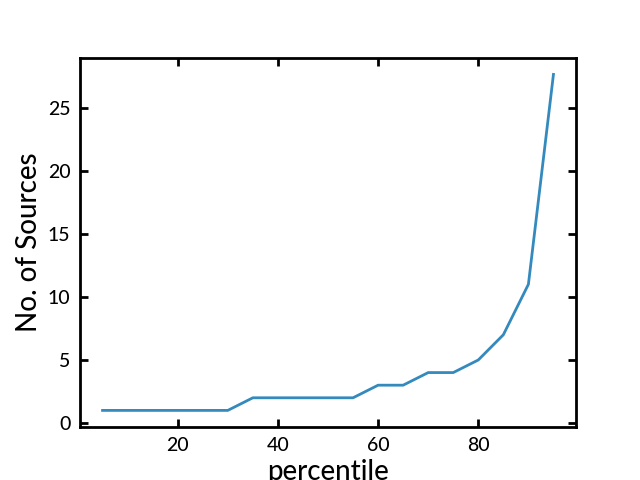

Text(0, 0.5, 'No. of Sources')

In [16]:
plt.plot(range(5,100, 5), c)
plt.xlabel('percentile')
plt.ylabel('No. of Sources')

In [18]:
df3[(df3['count'] < 10)& (df3['count'] > 5)]

,mean,count
Field,,
PSZ1_G203.14+67.55,8040.911100,8
PSZ1_G288.27+11.71,4964.454000,6
PSZ2_G000.04+45.13,9051.353000,8
PSZ2_G004.04+42.23,5235.242400,7
PSZ2_G052.35-31.98,6541.545700,7
PSZ2_G056.62+88.42,7043.005700,9
PSZ2_G057.92+27.64,5237.749700,8
PSZ2_G063.80+11.42,5230.227800,6
PSZ2_G080.37+14.64,7466.739400,9


<IPython.core.display.Javascript object>


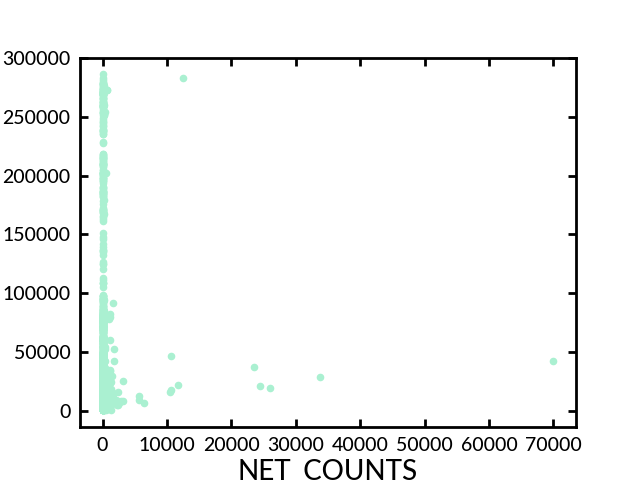

In [39]:
df.plot.scatter('NET_COUNTS', 'EXPTIME')

<IPython.core.display.Javascript object>


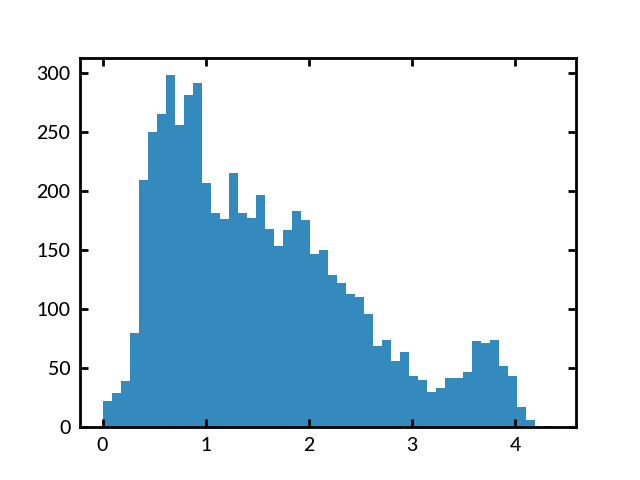

(array([ 22.,  29.,  39.,  80., 209., 250., 265., 298., 256., 281., 291.,
        207., 181., 176., 215., 181., 177., 197., 168., 153., 167., 183.,
        175., 147., 150., 129., 122., 113., 110.,  96.,  69.,  74.,  56.,
         64.,  43.,  40.,  30.,  33.,  42.,  42.,  47.,  73.,  71.,  74.,
         52.,  43.,  17.,   6.,   0.,   1.]),
 array([0.        , 0.0874556 , 0.1749112 , 0.2623668 , 0.3498224 ,
        0.43727797, 0.5247336 , 0.6121892 , 0.6996448 , 0.7871004 ,
        0.87455595, 0.9620116 , 1.0494672 , 1.1369227 , 1.2243783 ,
        1.311834  , 1.3992896 , 1.4867451 , 1.5742007 , 1.6616564 ,
        1.7491119 , 1.8365675 , 1.9240232 , 2.0114787 , 2.0989344 ,
        2.18639   , 2.2738454 , 2.3613012 , 2.4487567 , 2.5362122 ,
        2.623668  , 2.7111235 , 2.7985792 , 2.8860347 , 2.9734902 ,
        3.060946  , 3.1484015 , 3.235857  , 3.3233128 , 3.4107683 ,
        3.4982238 , 3.5856795 , 3.673135  , 3.7605906 , 3.8480463 ,
        3.9355018 , 4.0229573 , 4.110413  , 4.

In [36]:
plt.hist(np.log10(df['SRC_AREA']), bins=50)

In [6]:
data = load_MCMCfits(outpath, name)

In [7]:
data

Field,INDEX,So_50,So_84,So_16,rc_50,rc_84,rc_16,beta_50,beta_84,beta_16,bg_50,bg_84,bg_16,RA,RA_ERR,DEC,DEC_ERR,X,Y,X_ERR,Y_ERR,SRC_AREA,NET_COUNTS,NET_COUNTS_ERR,BKG_COUNTS,BKG_COUNTS_ERR,NET_RATE,NET_RATE_ERR,BKG_RATE,BKG_RATE_ERR,EXPTIME,SRC_CUTOFF,FSP,EDGE_OF_FIELD,SHAPE,R [2],ROTANG,COMPONENT,HIGH
str18,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes10,float32,float32,int32,int32
PSZ2_G000.04+45.13,2,0.00766,0.0013,0.00112,0.74739,0.20666,0.16152,0.43213,0.05349,0.03801,0.00033,6e-05,6e-05,229.18622931138344,0.0007159193234542727,-0.9700134068991866,0.000652016222236651,486.25464408876473,364.11228125811255,1.0931679565690642,0.9957404361169704,6917.151,411.47375,21.702553,59.526245,0.027799003,0.051849335,0.0027347137,1.0,1.0,7935.9507,3.016655,-1.0,0,ellipse,71.94003 .. 63.978664,-18.565594,3,1
PSZ2_G000.04+45.13,4,0.00072,0.00043,0.00026,3.31406,1.9907,1.59651,1.74686,0.86187,0.82152,0.00056,1e-05,1e-05,229.23991340959455,0.0023141593833884144,-0.9048528946782052,0.0013969081927364124,404.2801979831843,463.6223044681497,3.5336278403838026,2.1333684675271516,1443.4697,26.15449,6.1644173,11.84551,0.0062352913,0.0032467174,0.0007652269,1.0,1.0,8055.672,2.01528,0.00010929503,0,ellipse,70.46096 .. 29.362827,24.292728,3,0
PSZ2_G000.04+45.13,8,0.00269,0.00132,0.00084,2.64809,1.24311,1.28354,1.67195,0.91071,0.81944,0.00045,2e-05,2e-05,229.33628318382517,0.0017018869135370096,-0.7227901062221428,0.001137881444083999,257.11369574983286,741.6590577945295,2.5988083706963665,1.7378411566956369,1828.1083,35.530876,6.5574393,7.4691253,0.0034881122,0.009772304,0.0018035383,1.0,1.0,3635.875,3.0247278,2.306359e-15,1,ellipse,56.652554 .. 23.937128,28.383345,7,1


In [5]:
c = -3 * fits['beta_50'] + 0.5
d = fits['rc_50'] * ((1/2)**(1/c) - 1)**0.5
e = np.sqrt(1 - fits['R'][:,1]**2 / fits['R'][:,0]**2)


/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [20]:
fits.remove_column('R')

In [10]:
import corner

<IPython.core.display.Javascript object>


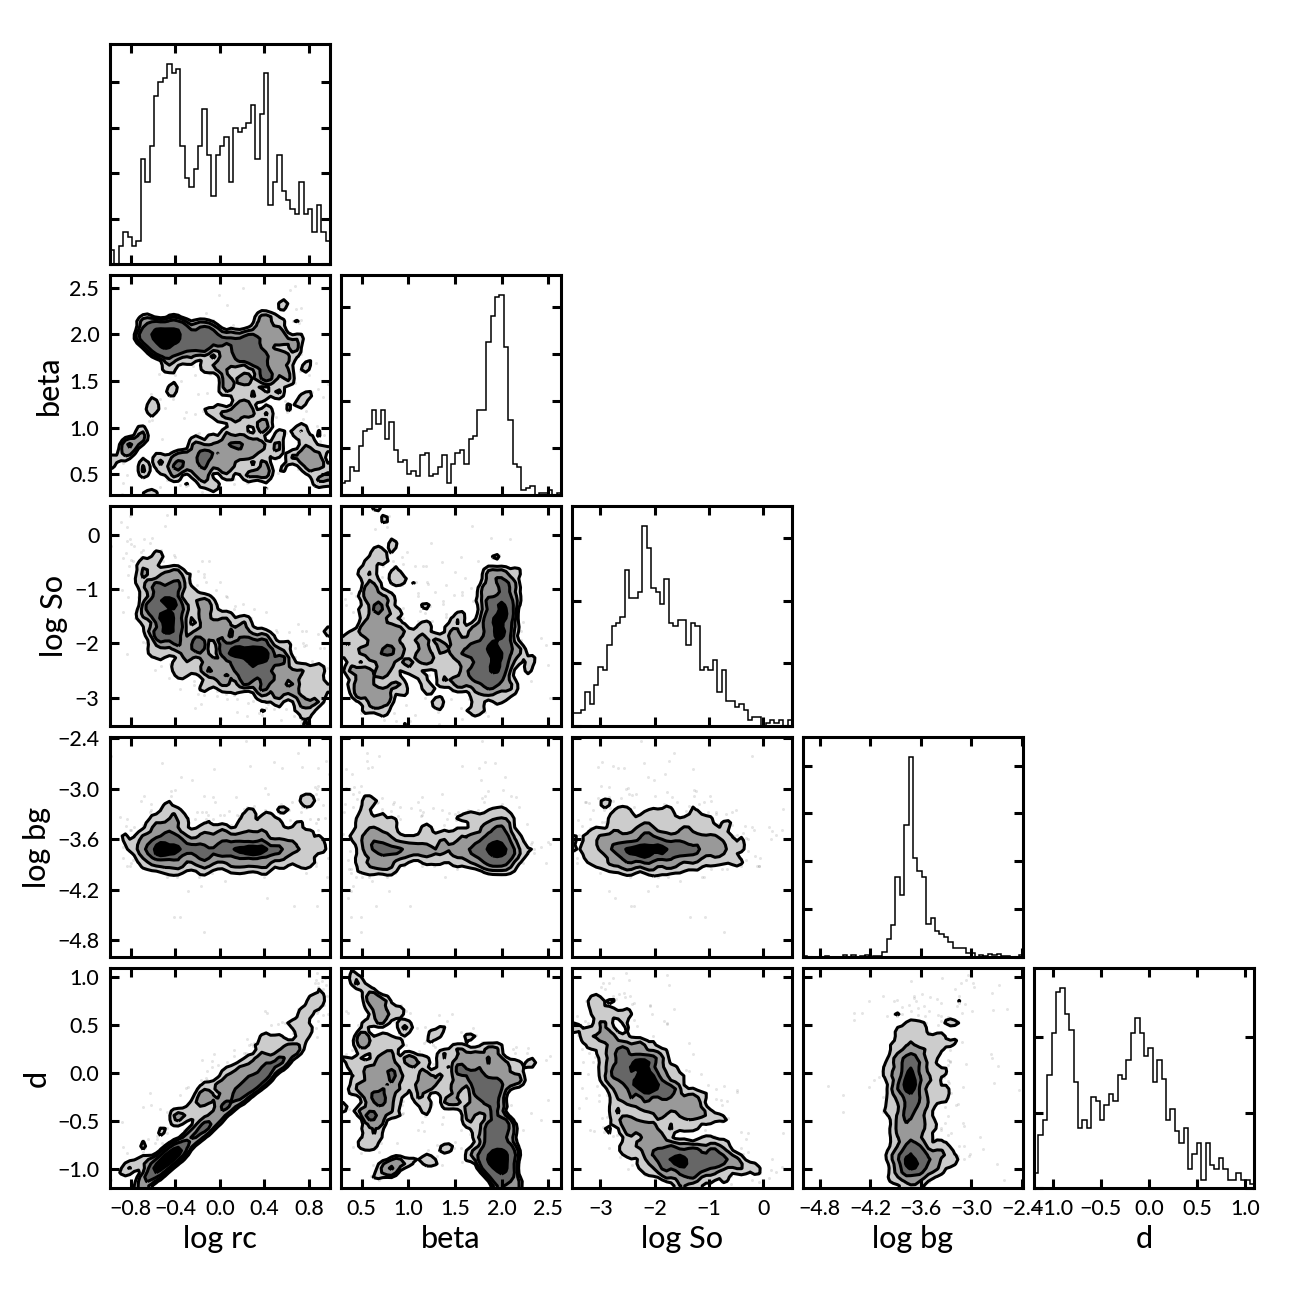

In [11]:
data = np.vstack([np.log10(fits['rc_50'].data),
                  fits['beta_50'].data,
                  np.log10(fits['So_50'].data),
                  np.log10(fits['bg_50'].data), 
                  np.log10(d)])

f = corner.corner(data.T, labels=['log rc', 'beta', 'log So', 'log bg', 'd'],
                    bins=[50, 50, 50, 50, 50],
                    smooth=True,
                    fill_contours=True)

In [53]:
data.T

array([[0.74285, 0.43537],
       [0.74285, 0.43537],
       [3.30979, 1.80614],
       ...,
       [4.79131, 1.42491],
       [4.71529, 1.41619],
       [4.71529, 1.41619]])

In [44]:
fits['rc_50'].data

array([0.74285, 0.74285, 3.30979, ..., 4.79131, 4.71529, 4.71529])

<IPython.core.display.Javascript object>


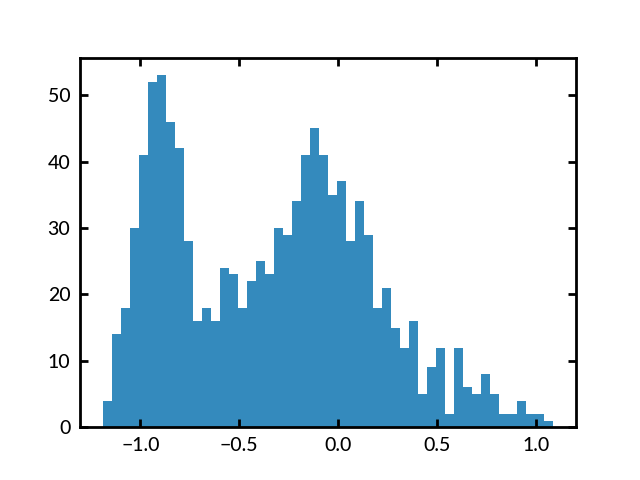

In [125]:
# x = visualization.hist(d, bins='blocks')
x = plt.hist(np.log10(d), bins=50)

In [155]:
x =  np.log10(fits['rc_50']).data.reshape(-1,1)
# x =  np.log10(d).reshape(-1,1)

In [15]:
from sklearn import mixture
import scipy.stats as stats

In [157]:
lowest_bic = np.infty                                                   
bic = []                                                                                                      


# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = mixture.GaussianMixture(N[i]).fit(x)

# compute the AIC and the BIC
AIC = [m.aic(x) for m in models]
BIC = [m.bic(x) for m in models]

M_best = models[np.argmin(BIC)]


# # Fit a mixture of Gaussians with EM                            
# gmm = mixture.GaussianMixture(n_components=3,                    
#         covariance_type='full')                                
# gmm.fit(x)

In [158]:
M_best

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [162]:
xnew = np.linspace(-1, 1, 1000)
logprob = M_best.score_samples(xnew.reshape(-1, 1))
responsibilities = M_best.predict_proba(xnew.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

<IPython.core.display.Javascript object>


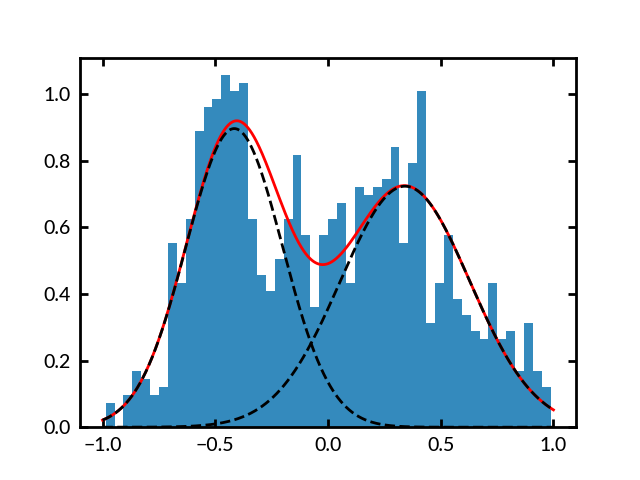

In [163]:
x = plt.hist(np.log10(fits['rc_50']), bins=50, density=True)
# x = plt.hist(np.log10(d), bins=50, density=True)

plt.plot(xnew, pdf, '-r')
plt.plot(xnew, pdf_individual, '--k')

<IPython.core.display.Javascript object>


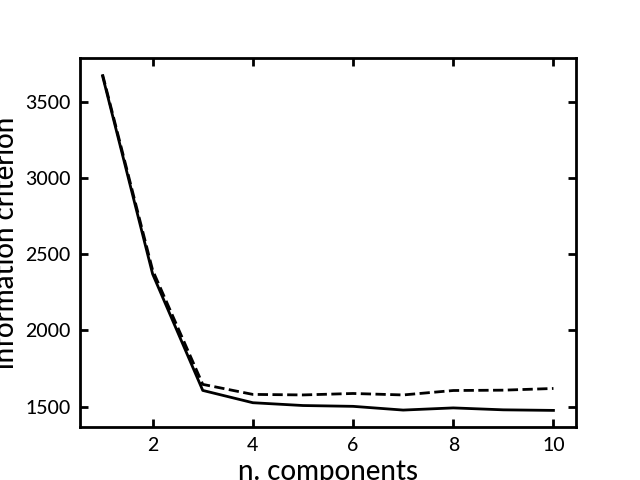

Text(0, 0.5, 'information criterion')

In [119]:
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')
plt.xlabel('n. components')
plt.ylabel('information criterion')

In [135]:
10 ** -0.6

0.251188643150958

In [145]:
a = np.arange(10)

In [146]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [147]:
def printa():
    print(a)

In [148]:
printa()

[0 1 2 3 4 5 6 7 8 9]


In [164]:
10 ** -0.4

0.3981071705534972

In [98]:
data = fits[['rc_50', 'beta_50']]

In [99]:
y = data.as_array()

In [100]:
gmm = mixture.GaussianMixture(3).fit(y.tolist())

In [101]:
x = np.linspace(0., 10.)
y = np.linspace(0., 3.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

<IPython.core.display.Javascript object>


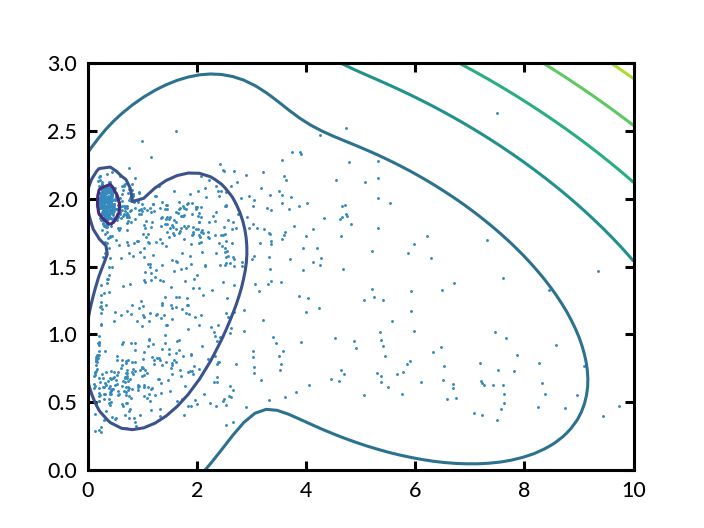

In [102]:
CS = plt.contour(X, Y, Z, )
plt.scatter(data['rc_50'], data['beta_50'], .8)

In [103]:
colors = ['navy', 'turquoise', 'darkorange']
import matplotlib as mpl


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        #ax.set_aspect('equal', 'datalim')

<IPython.core.display.Javascript object>


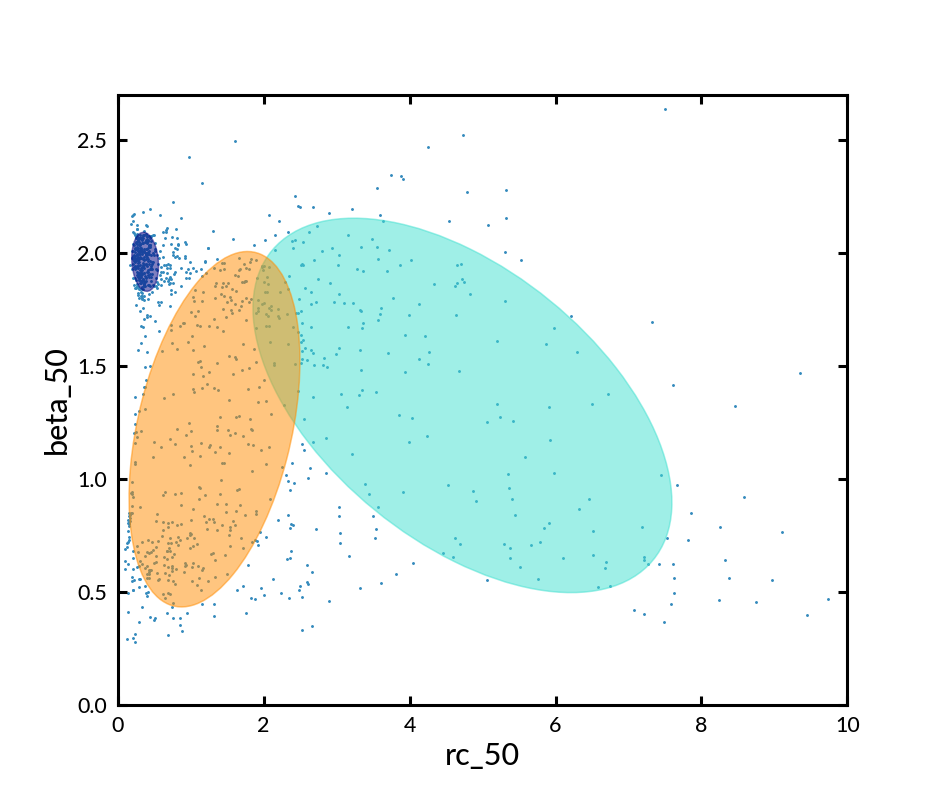

(0, 10)

In [104]:
f = plt.figure()
ax = f.add_subplot()
make_ellipses(gmm, ax)
plt.xlabel('rc_50')
plt.ylabel('beta_50')


ax.scatter(data['rc_50'], data['beta_50'], .8)

plt.ylim(0, 2.7)
plt.xlim(0, 10)


In [60]:
data['beta_50'].min()

0.27695

In [105]:
gmm.means_

array([[0.37599457, 1.96150676],
       [4.72418408, 1.3259018 ],
       [1.32662397, 1.22044006]])

In [120]:
0.37 * 60

22.2

In [115]:
# fit models with 1-10 components
N = np.arange(1, 5)
models = [None for i in range(len(N))]

data = fits[['rc_50', 'beta_50']]
y = data.as_array()

y = np.asarray(y.tolist())


for i in range(len(N)):
    models[i] = mixture.GaussianMixture(N[i]).fit(y)

# compute the AIC and the BIC
AIC = [m.aic(y) for m in models]
BIC = [m.bic(y) for m in models]

M_best = models[np.argmin(BIC)]

In [116]:
M_best

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<IPython.core.display.Javascript object>


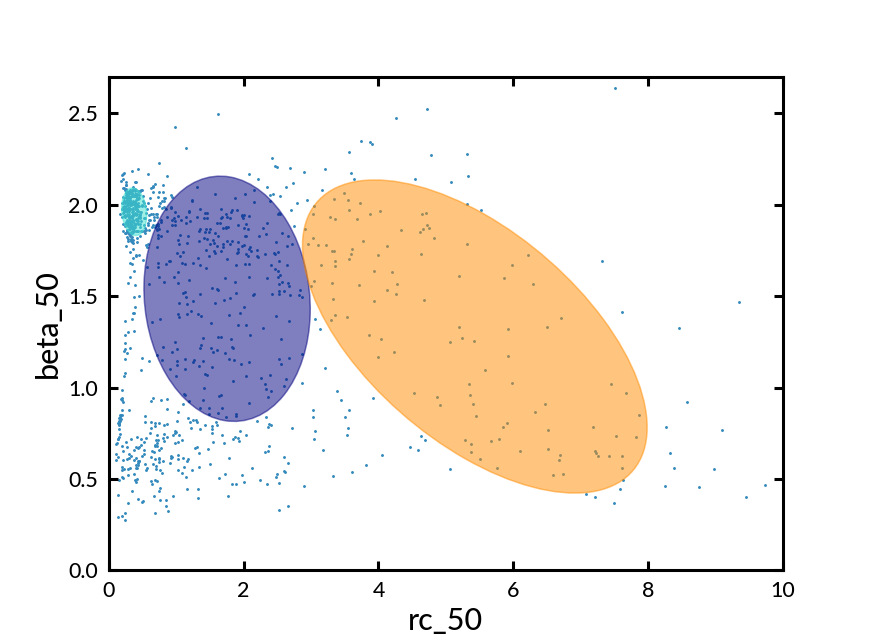

(0, 10)

In [117]:
f = plt.figure()
ax = f.add_subplot()
make_ellipses(M_best, ax)
plt.xlabel('rc_50')
plt.ylabel('beta_50')


ax.scatter(data['rc_50'], data['beta_50'], .8)

plt.ylim(0, 2.7)
plt.xlim(0, 10)

In [118]:
M_best.means_

array([[1.75488457, 1.48552631],
       [0.37667609, 1.96127275],
       [5.42863425, 1.27919696],
       [0.63928116, 0.65171512]])